In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras import backend as k
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, AveragePooling2D

/Users/franzi/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#load mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #everytime loading data won't be so easy :)

In [3]:
#Visualizing the data
#sample = X_train.iloc[10, :]
#sample = sample.reshape([28,28])
#plt.imshow(sample, cmap='gray')

X_train = np.array(X_train)
X_test = np.array(X_test)

#Reshape the training and test set
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

#Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

#One-hot encoding the labels
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [4]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

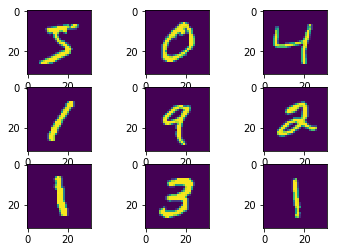

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,:,:,0])

#### LeNet-5

In [6]:
##model building
model = Sequential()

#model.add(Conv2D(1, kernel_size = (1,1), input_shape=input_shape, padding='valid'))

model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation='tanh', input_shape = (32,32,1)))

model.add(AveragePooling2D(pool_size= 2, strides = 2))

model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation='tanh', input_shape = (14,14,6)))

model.add(AveragePooling2D(pool_size= 2, strides = 2))

model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation='tanh'))

model.add(Flatten())

#model.add(Dense(units = 120, activation='tanh'))

model.add(Dense(units = 84, activation='tanh'))

model.add(Dense(units = 10, activation = 'softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
batch_size = 128

model.fit(X_train ,Y_train, batch_size=batch_size, epochs = 10, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 727us/step - loss: 0.2761 - acc: 0.9190 - val_loss: 0.2819 - val_acc: 0.9142
Epoch 2/10
60000/60000 [==============================] - 43s 723us/step - loss: 0.0785 - acc: 0.9764 - val_loss: 0.1504 - val_acc: 0.9534
Epoch 3/10
60000/60000 [==============================] - 45s 744us/step - loss: 0.0542 - acc: 0.9836 - val_loss: 0.1165 - val_acc: 0.9637
Epoch 4/10
60000/60000 [==============================] - 51s 858us/step - loss: 0.0428 - acc: 0.9869 - val_loss: 0.1516 - val_acc: 0.9516
Epoch 5/10
60000/60000 [==============================] - 58s 965us/step - loss: 0.0339 - acc: 0.9893 - val_loss: 0.2256 - val_acc: 0.9373
Epoch 6/10
60000/60000 [==============================] - 57s 945us/step - loss: 0.0290 - acc: 0.9909 - val_loss: 0.1600 - val_acc: 0.9515
Epoch 7/10
60000/60000 [==============================] - 53s 888us/step - loss: 0.0234 - acc: 0.9929 - val_loss: 0.

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.1871767867859453)
('Test accuracy:', 0.9451)
